# Data and Model

**Data:**


|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |


**Model 1:**

* For each group (treatment and control), all 6 studies have the same fixed, but unknown, probability of success, $\theta_t,\theta_c\in[0,1]$.
* The data follow a binomial distribution in each study, conditioned on the probability of success — $\theta_t$ for treatment or $\theta_c$ for control.
* The priors over $\theta_t$ and $\theta_c$ are uniform.

These assumptions lead to the following model.

* Likelihood: $\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i)$, where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients.

* Prior: $\text{Beta}(\theta\,|\,1,1)$ for both $\theta_t$ and $\theta_c$.

* Posterior for treatment group: $\text{Beta}(\theta_t\,|\,108, 35)$.

* Posterior for control group: $\text{Beta}(\theta_c\,|\,58, 65)$.

In [9]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

# Test Stat Function

In [8]:
# I could use np.var for this, but in case
# you wanted us to write code for the test stat

def calcVar(vals):
    mu = sum(vals) / len(vals)
    sd2 = sum((mu - v) ** 2 for v in vals) / len(vals)
    return(sd2)# Test Stat Function

# Generate Test Stat over Samples

In [10]:
# posterior is beta(58,65)

numSamples = 10000

# get sample variances of probability of success
sample_var = []
for _ in range(numSamples):
    sample = sts.beta.rvs(58,65,size=100) # get sample
    sample_var.append(calcVar(sample)) # get test stat

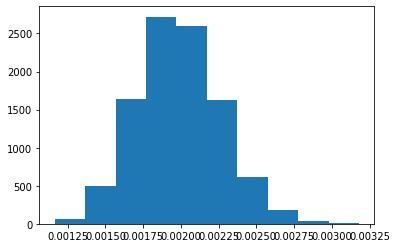

In [13]:
plt.hist(sample_var);

# P-value of Test Stat

In [16]:
# true variance of probability of success
prob_success = [9/15,11/18,4/10,21/39,12/29,0/10,57/121]

true_var = calcVar(prob_success)
print("true var: ",true_var)

# calculate p value
p_val = sum([s<true_var for s in sample_var])/len(sample_var)
print("p value: ",p_val)
if p_val > 0.95 or p_val < 0.05:
    print("there's an issue with the model")

true var:  0.037304225235833925
p value:  1.0
there's an issue with the model


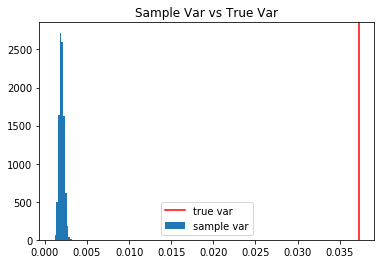

In [21]:
# plot difference
plt.hist(sample_var, label="sample var");
plt.axvline(x=true_var, color="r", label="true var");
plt.title("Sample Var vs True Var");
plt.legend();